In [1]:
from tms_risk.cogmodels.fit_model import build_model, get_data
from tms_risk.cogmodels.utils import plot_prediction, stimulation_order, stimulation_palette
import seaborn as sns
import arviz as az
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from bauer.utils.math import softplus_np
import numpy as np
from bauer.models import FlexibleNoiseRiskRegressionModel
from tqdm import tqdm

bids_folder = '/data/ds-tmsrisk'

# Some convenience functions
def get_info(model_label, bids_folder='/data/ds-tmsrisk'):

    df = get_data(model_label=model_label, bids_folder=bids_folder)
    model = build_model(df=df, model_label=model_label)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

    return df, model, idata

# 5-spline models

In [2]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1', 'flexible1a', 'flexible1b', 'flexible2', 'flexible2a', 'flexible2b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)
    model.build_estimation_model()
    curves.append(model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=True))
    curve_stats.append(FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(curves[-1].stack().to_frame('value'), groupby=['stimulation_condition']))

curve_stats = pd.concat(curve_stats, keys=model_labels, names=['model'])
curves = pd.concat(curves, keys=model_labels, names=['model'])

  0%|          | 0/6 [00:00<?, ?it/s]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


 17%|█▋        | 1/6 [00:07<00:35,  7.07s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


 33%|███▎      | 2/6 [00:13<00:26,  6.52s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


 50%|█████     | 3/6 [00:19<00:19,  6.48s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


 67%|██████▋   | 4/6 [00:25<00:12,  6.20s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


 83%|████████▎ | 5/6 [00:34<00:07,  7.11s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:156: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


100%|██████████| 6/6 [00:41<00:00,  6.98s/it]


In [9]:
def plot_prediction(data, x='x', y='value', **kwargs):
    ax = sns.lineplot(data=data, x=x, y=y, **kwargs)
    plt.fill_between(data[x], data['hdi025'], data['hdi975'], alpha=0.5, **kwargs)
    return ax

## Parameter plots

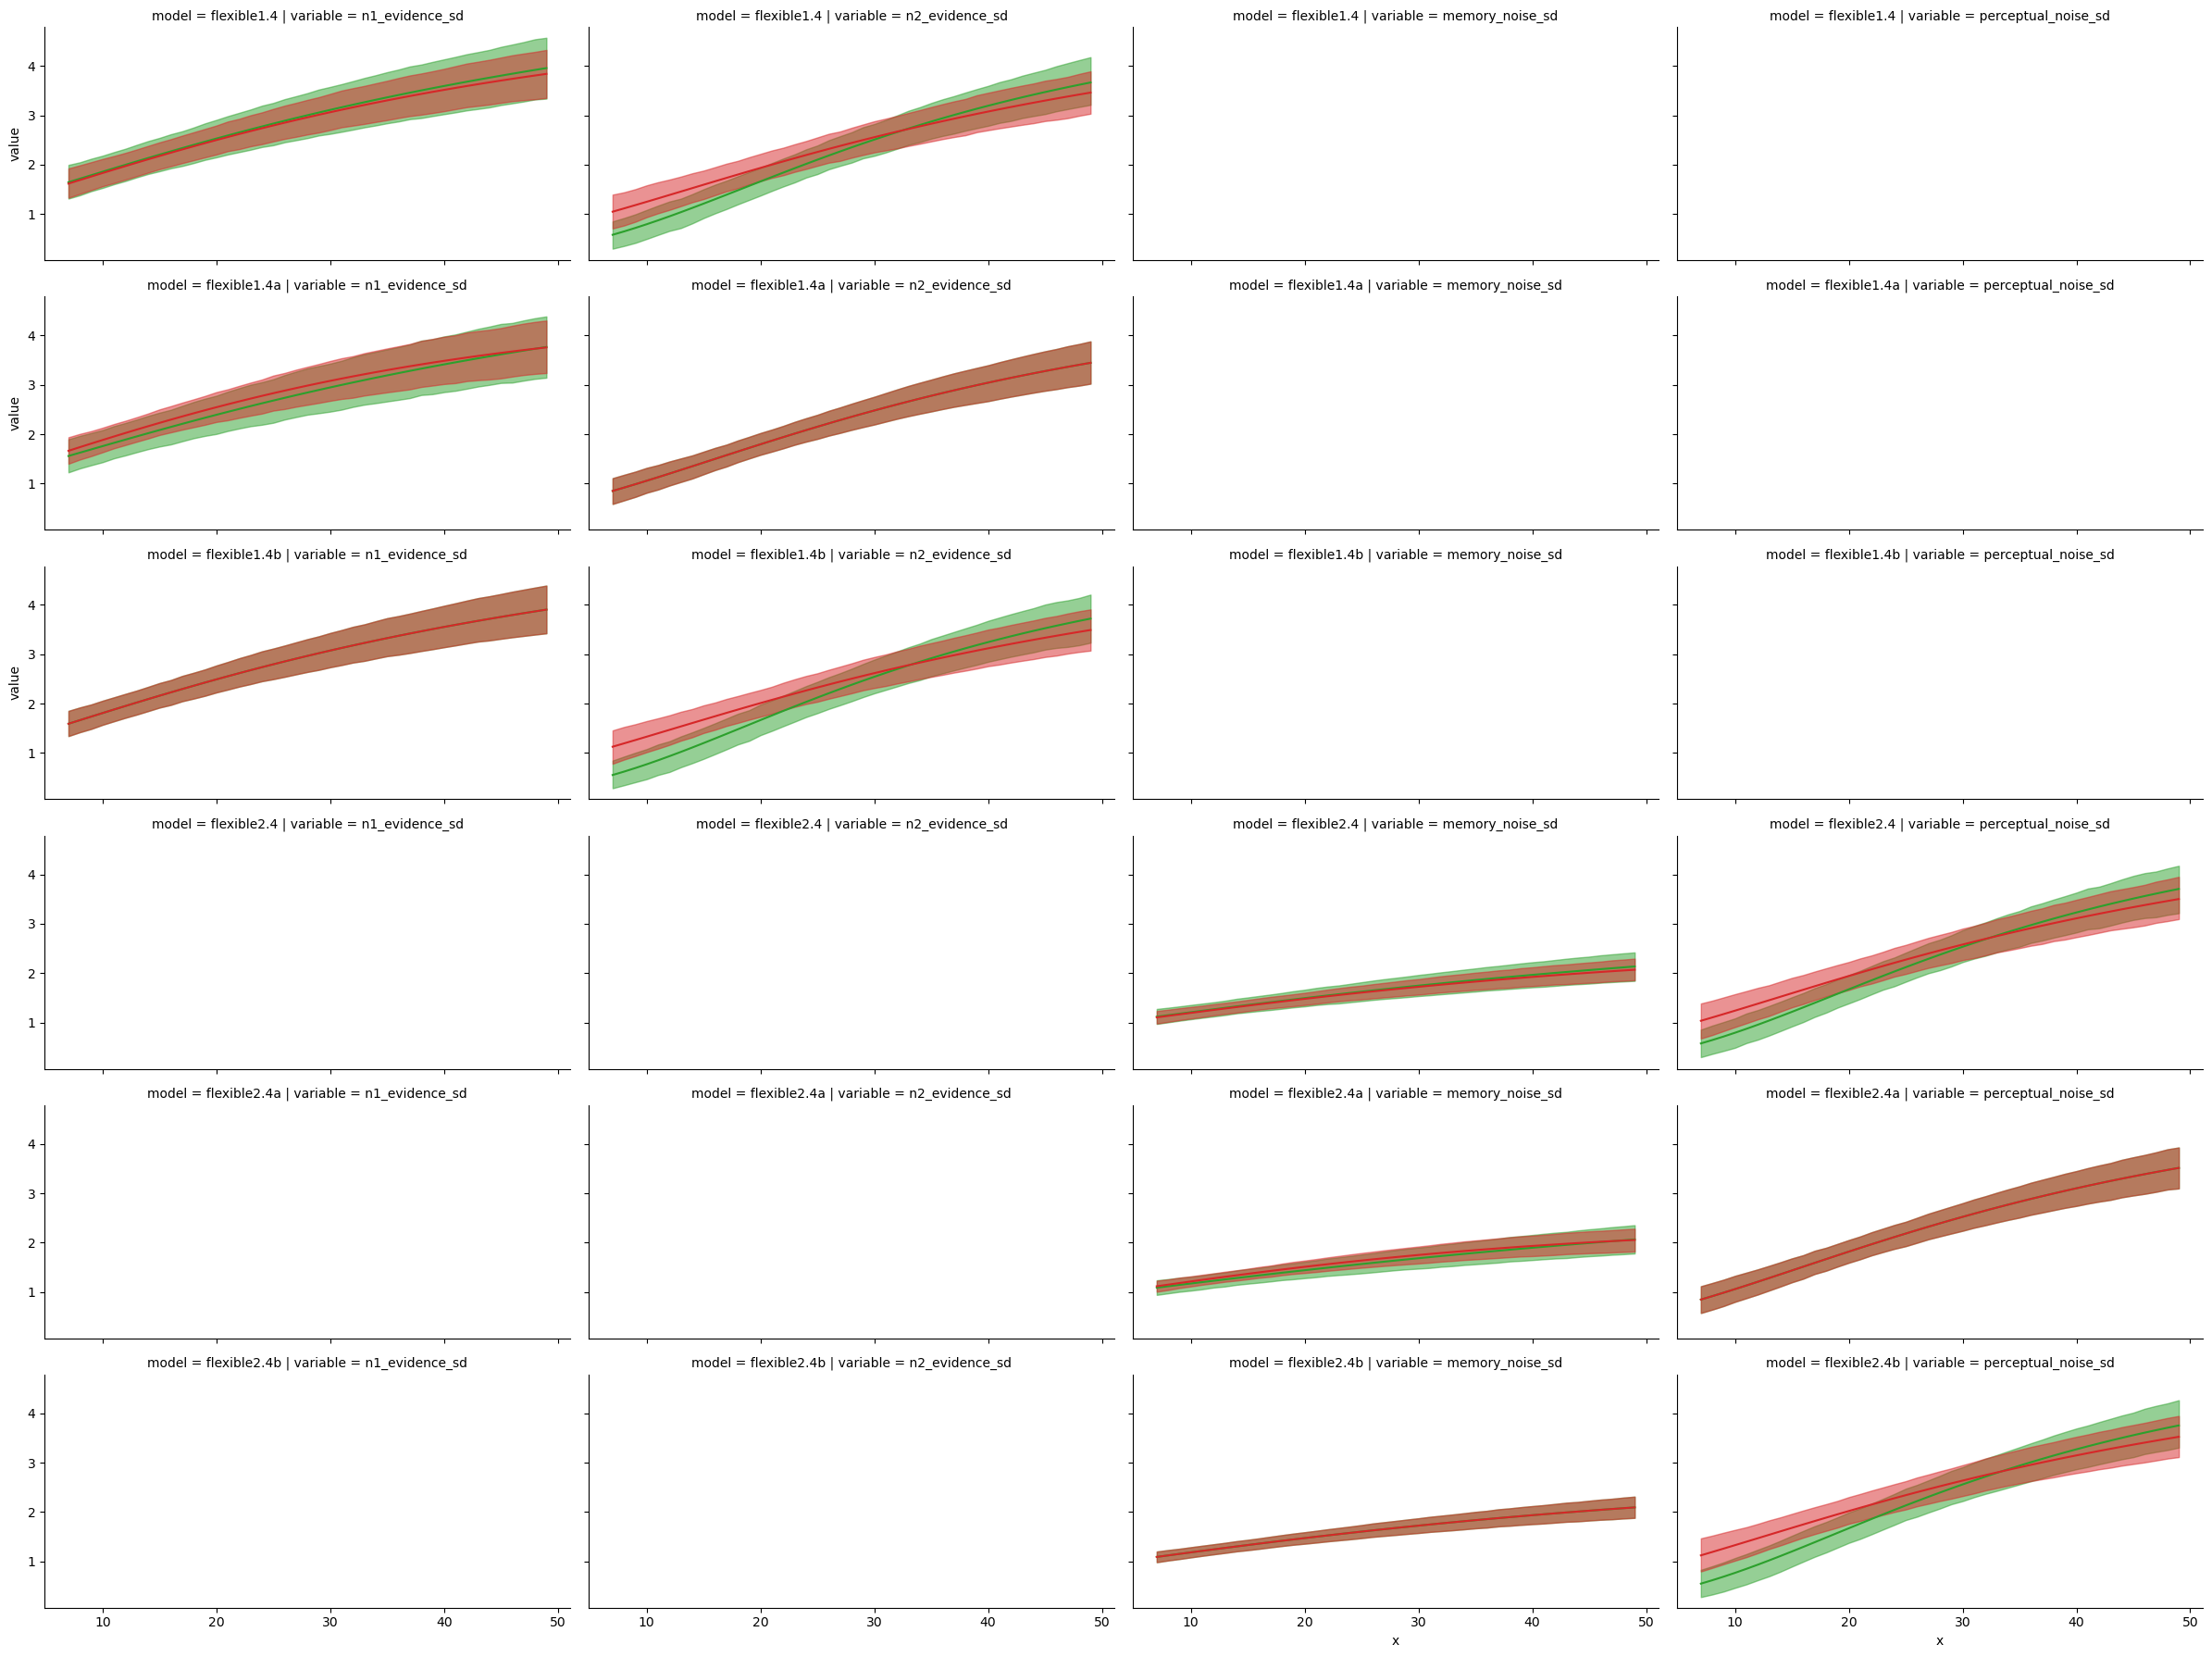

In [10]:
g = sns.FacetGrid(curve_stats.reset_index(), col='variable', hue='stimulation_condition', row='model', height=3, aspect=2, palette=stimulation_palette,
                  hue_order=['vertex', 'ips'])

g.map_dataframe(plot_prediction)

In [11]:
# Calculate differneces:

diff = curves.stack().unstack('stimulation_condition').diff(axis=1).mean(axis=1).to_frame('difference TMS - vertex')

diff_stats = FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(diff, groupby=['model'])

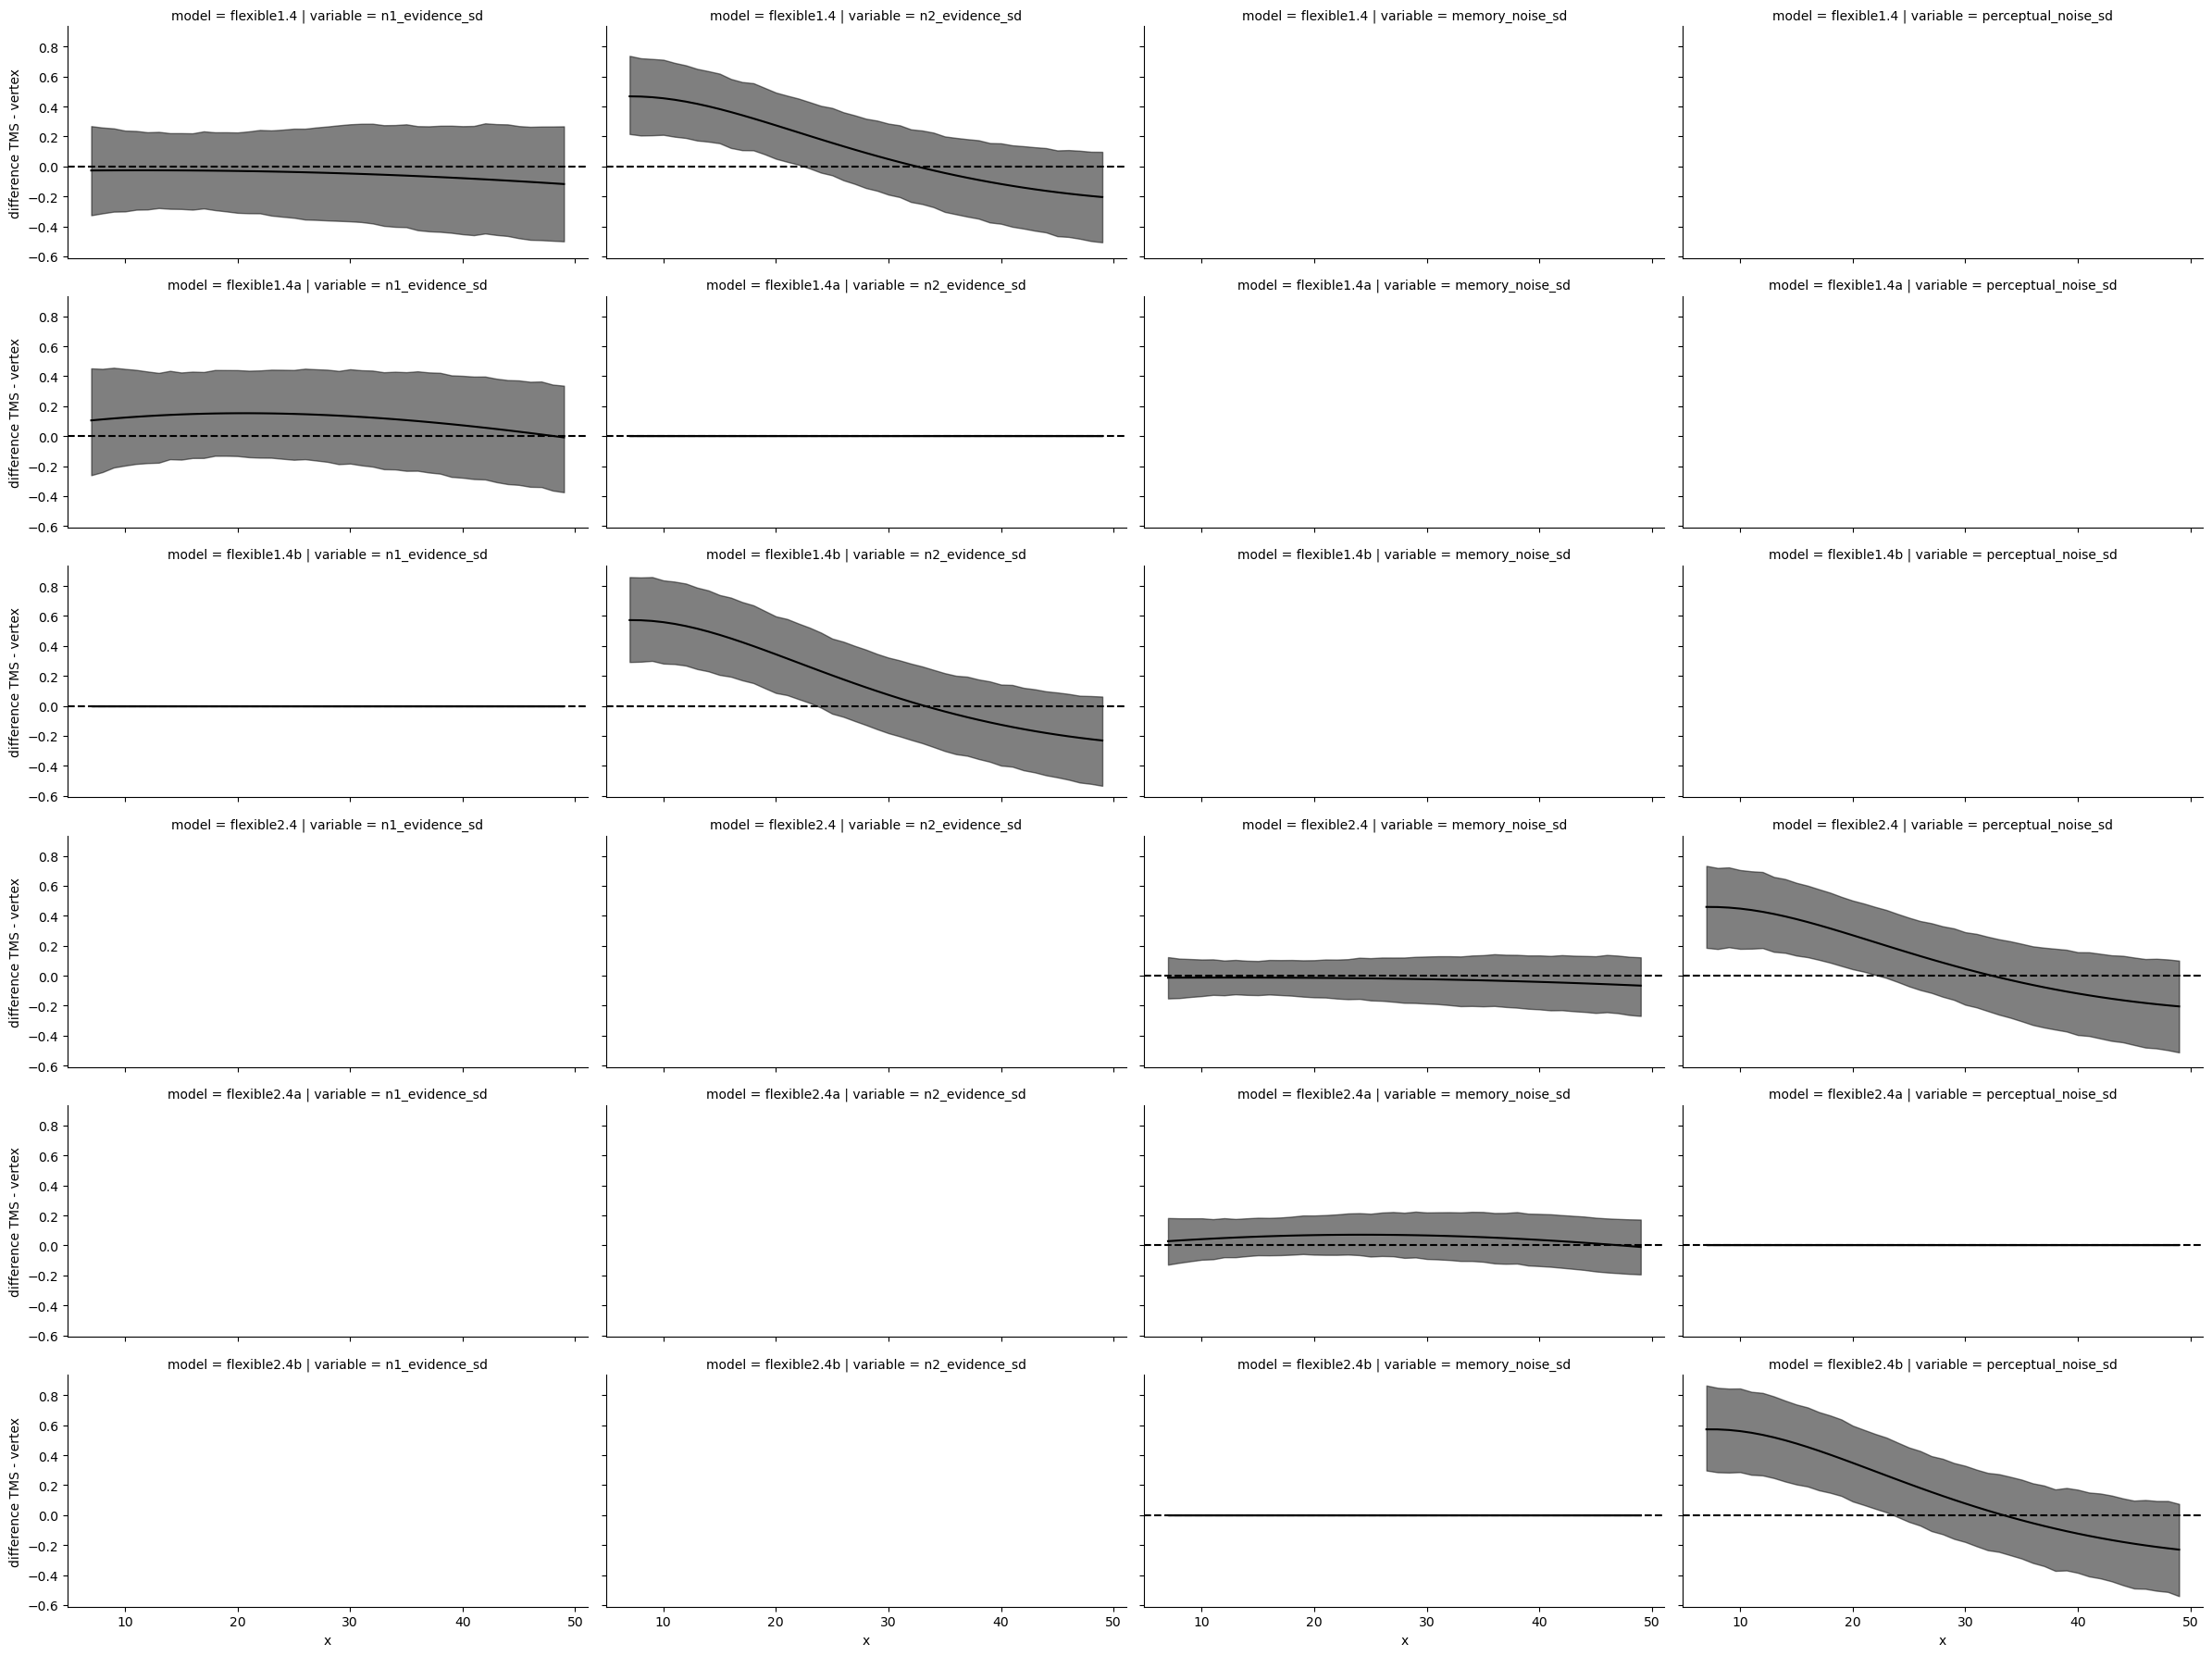

In [12]:
g = sns.FacetGrid(diff_stats.reset_index(), col='variable', row='model', height=3, aspect=2, palette=['k'],
                  row_order=model_labels, col_order=['n1_evidence_sd', 'n2_evidence_sd', 'memory_noise_sd', 'perceptual_noise_sd'])
g.map_dataframe(plot_prediction, x='x', y='difference TMS - vertex', color='k')

g.map(plt.axhline, y=0, color='black', linestyle='--')  

# 4-spline models

In [13]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1.4', 'flexible1.4a', 'flexible1.4b', 'flexible2.4', 'flexible2.4a', 'flexible2.4b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)
    model.build_estimation_model()
    curves.append(model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=True))
    curve_stats.append(FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(curves[-1].stack().to_frame('value'), groupby=['stimulation_condition']))

curve_stats = pd.concat(curve_stats, keys=model_labels, names=['model'])
curves = pd.concat(curves, keys=model_labels, names=['model'])

  0%|          | 0/6 [00:00<?, ?it/s]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found n1_evidence_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found n2_evidence_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
 17%|█▋        | 1/6 [00:06<00:30,  6.19s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found n1_evidence_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
 33%|███▎      | 2/6 [00:13<00:28,  7.01s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%'

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found n2_evidence_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
 50%|█████     | 3/6 [00:20<00:20,  6.90s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%'

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found memory_noise_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found perceptual_noise_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
 67%|██████▋   | 4/6 [00:27<00:13,  6.99s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found memory_noise_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
 83%|████████▎ | 5/6 [00:33<00:06,  6.66s/it]/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:279: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '20%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%', '32%

Dropping the baseline condition


/Users/gdehol/git/bauer/bauer/models.py:1565: UserWarning: Found perceptual_noise_sd in regressors, will add it for all 4 splines!
  warn(f'Found {key} in regressors, will add it for all {po} splines!')
100%|██████████| 6/6 [00:40<00:00,  6.70s/it]


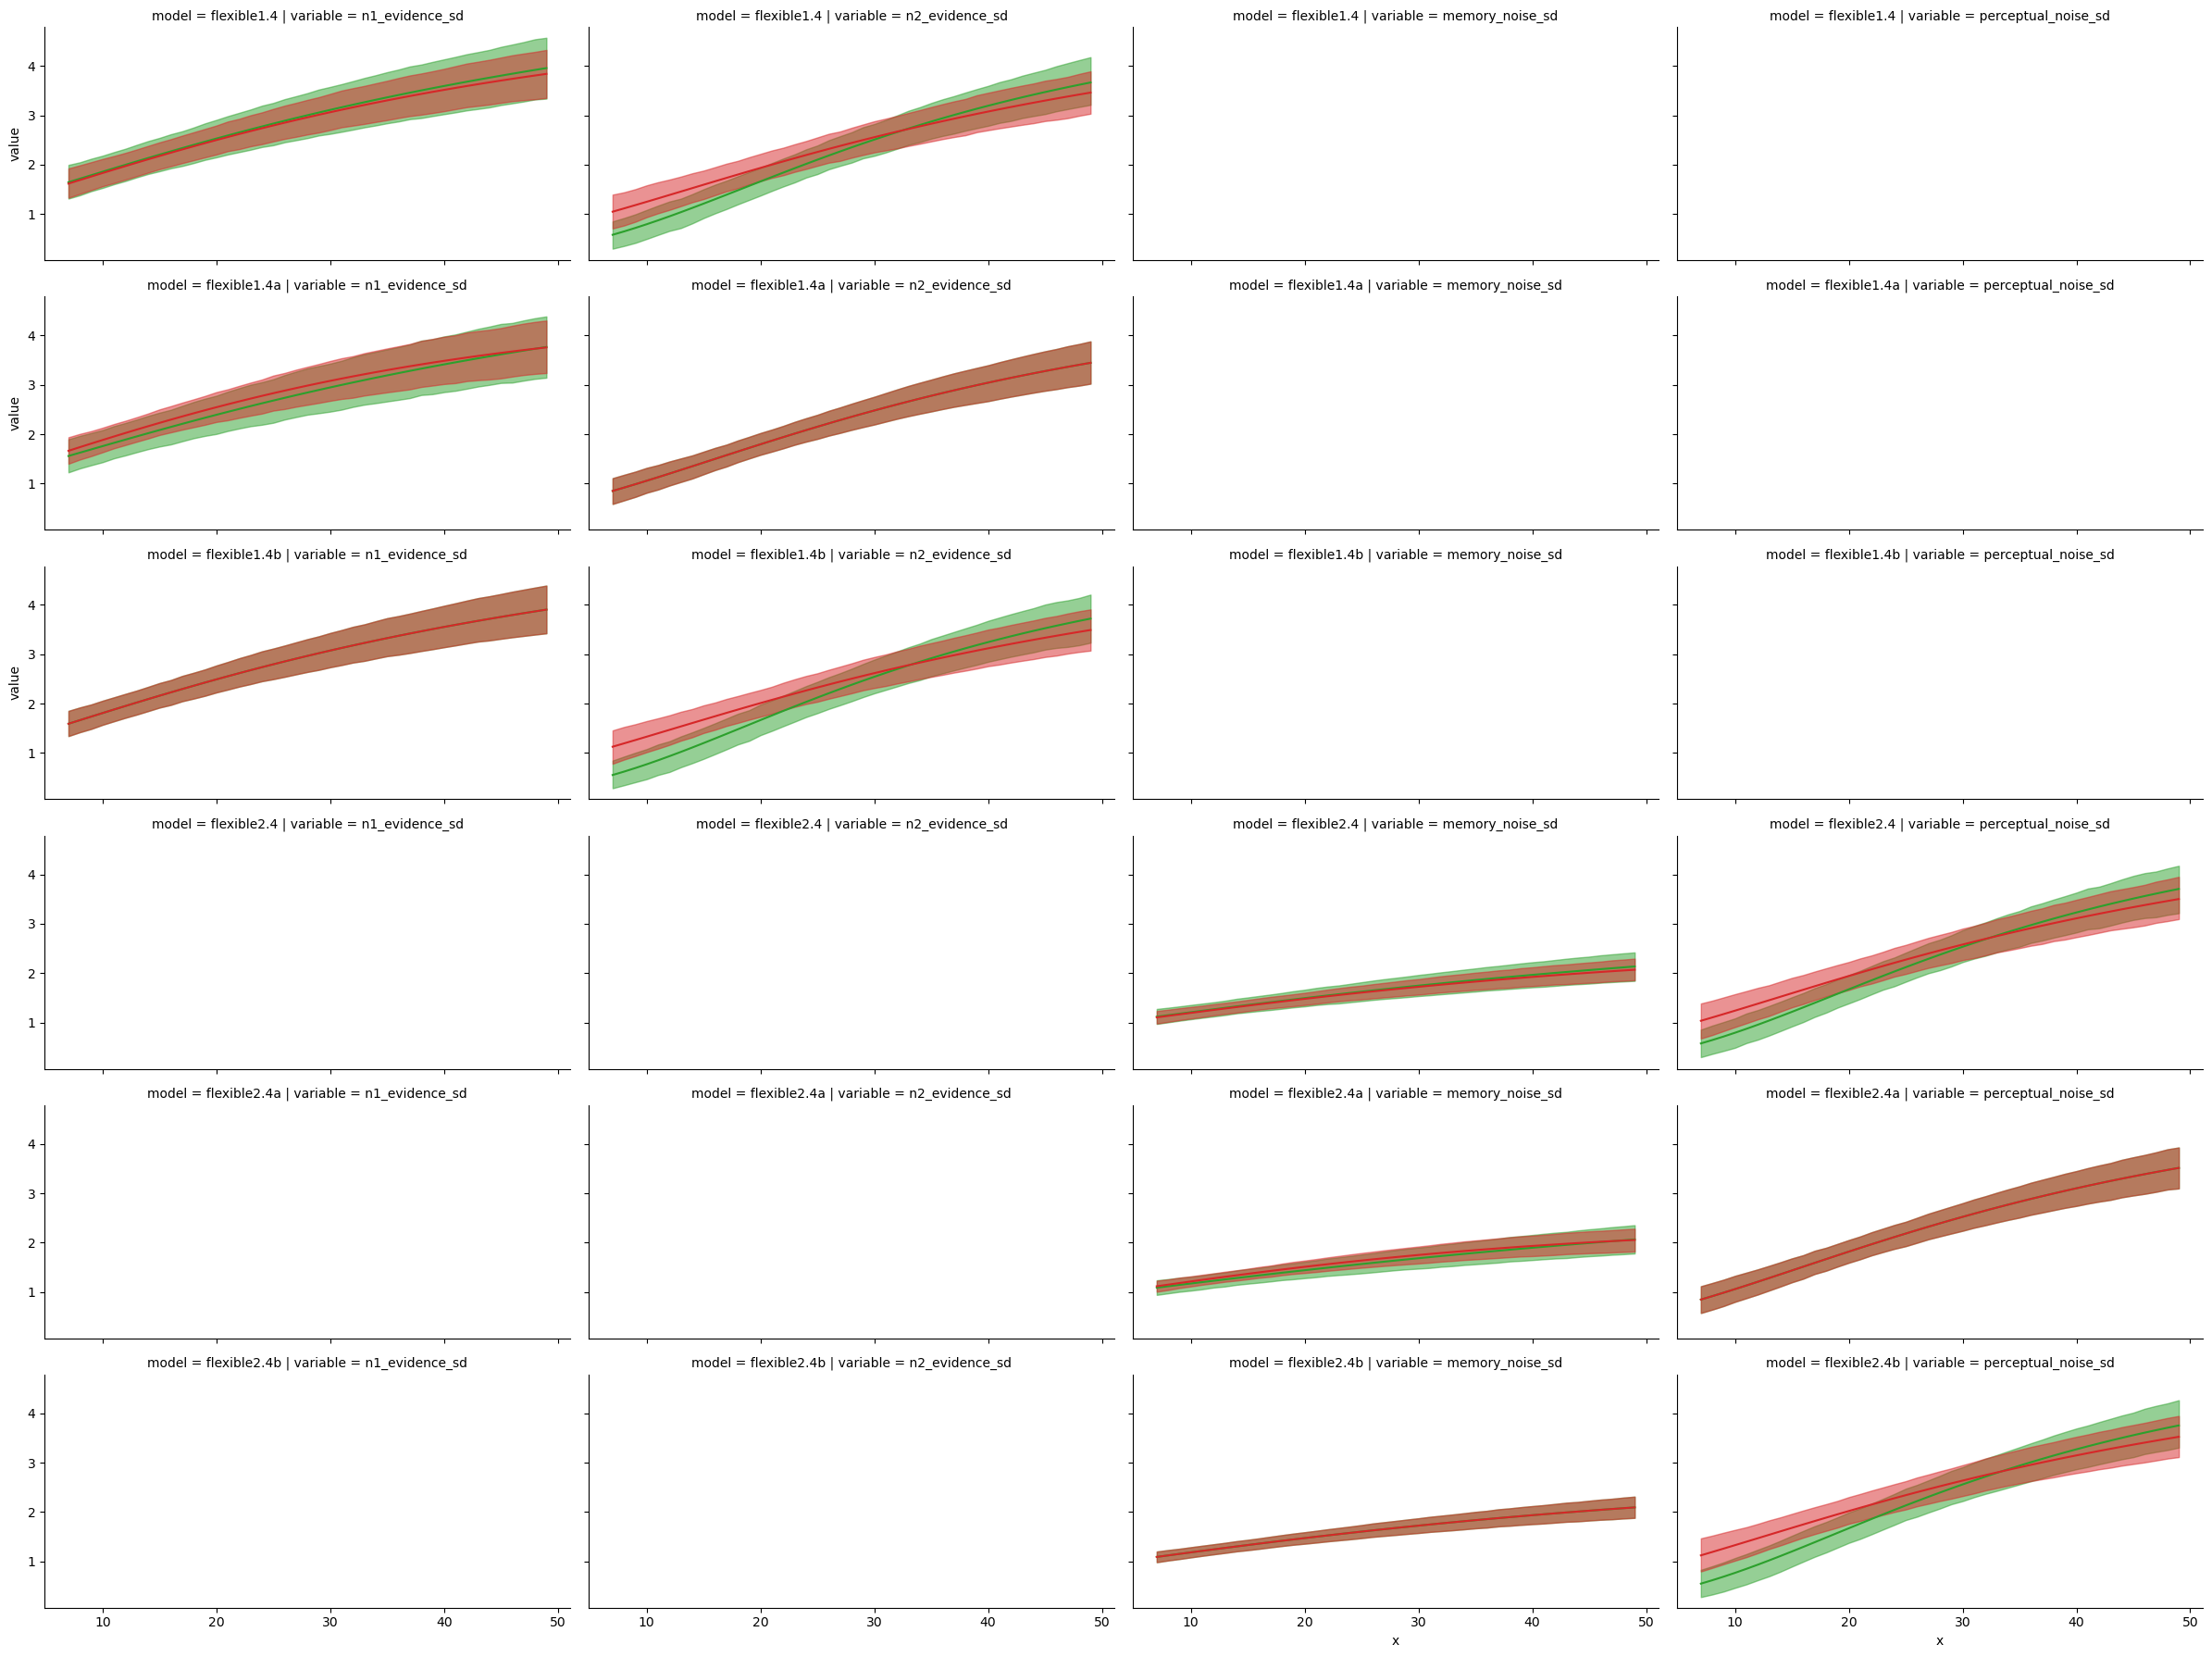

In [14]:
g = sns.FacetGrid(curve_stats.reset_index(), col='variable', hue='stimulation_condition', row='model', height=3, aspect=2, palette=stimulation_palette,
                  hue_order=['vertex', 'ips'])

g.map_dataframe(plot_prediction)

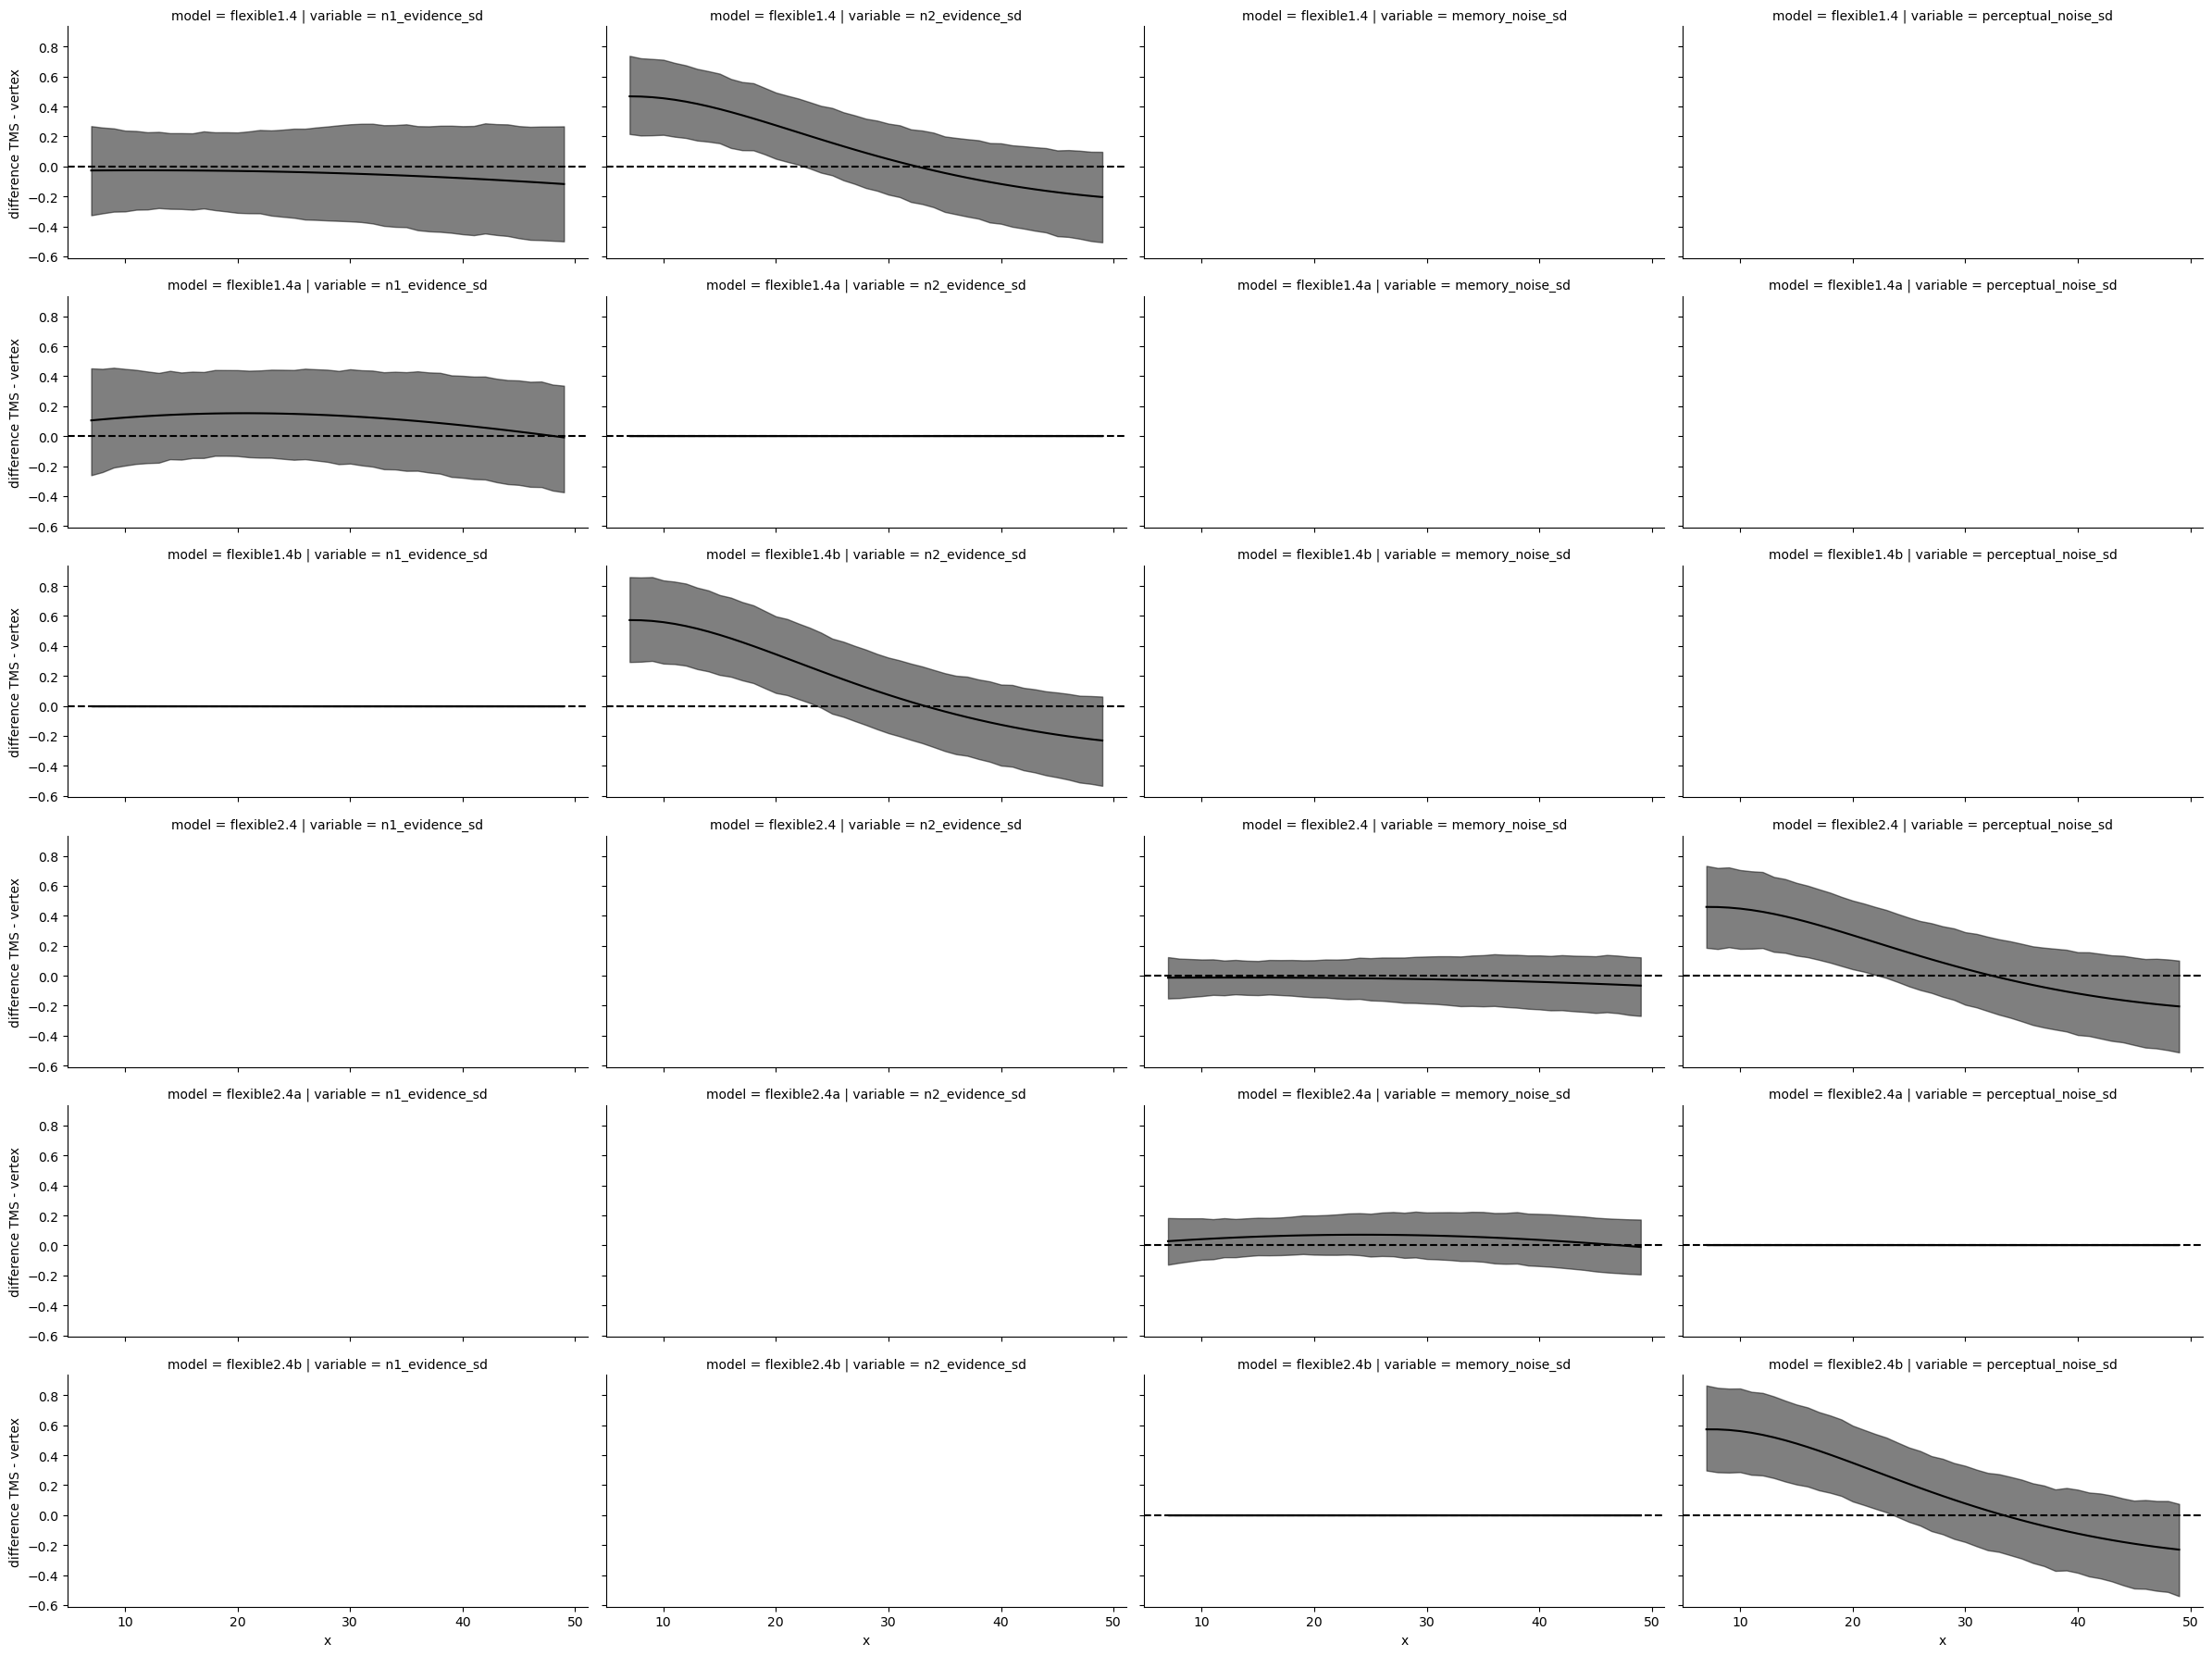

In [16]:
diff = curves.stack().unstack('stimulation_condition').diff(axis=1).mean(axis=1).to_frame('difference TMS - vertex')

diff_stats = FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(diff, groupby=['model'])

g = sns.FacetGrid(diff_stats.reset_index(), col='variable', row='model', height=3, aspect=2, palette=['k'],
                    row_order=model_labels, col_order=['n1_evidence_sd', 'n2_evidence_sd', 'memory_noise_sd', 'perceptual_noise_sd'])
g.map_dataframe(plot_prediction, x='x', y='difference TMS - vertex', color='k')

g.map(plt.axhline, y=0, color='black', linestyle='--')


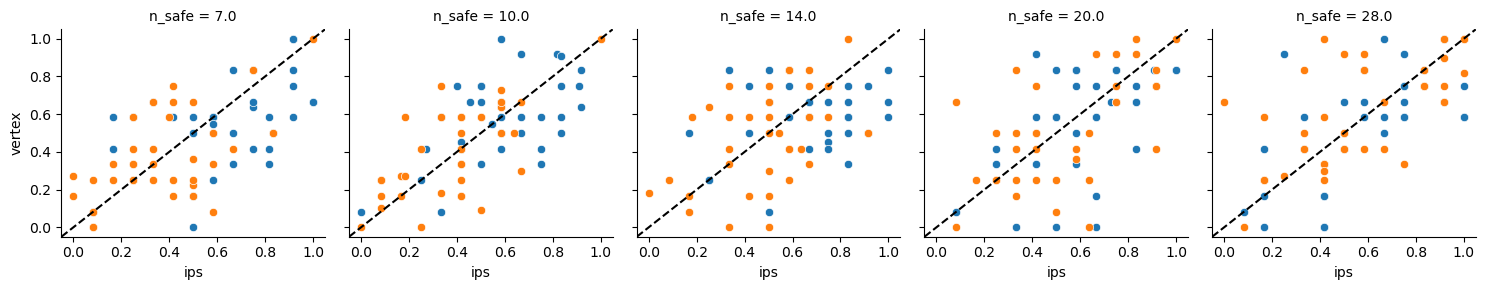

In [11]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe'])['choice'].mean()

tmp = tmp.unstack('stimulation_condition')

g = sns.FacetGrid(tmp.reset_index(), col='n_safe', hue='risky_first')

g.map(sns.scatterplot, 'ips', 'vertex')

# Identity line in each plot:
for ax in g.axes.flat:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='k')

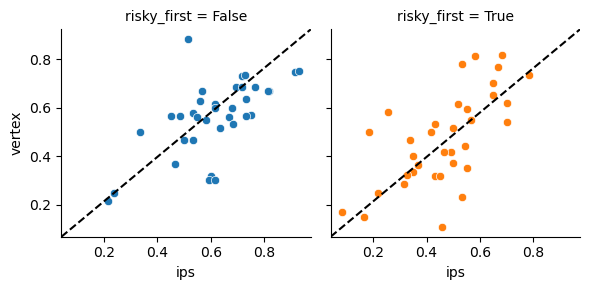

In [14]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first'])['choice'].mean()

tmp = tmp.unstack('stimulation_condition')

g = sns.FacetGrid(tmp.reset_index(), hue='risky_first', col='risky_first')

g.map(sns.scatterplot, 'ips', 'vertex')

# Identity line in each plot:
for ax in g.axes.flat:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='k')

In [ ]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1', 'flexible1a', 'flexible1b', 'flexible2', 'flexible2a', 'flexible2b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)
    model.build_estimation_model()
    curves.append(model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=True))
    curve_stats.append(FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(curves[-1].stack().to_frame('value'), groupby=['stimulation_condition']))

curve_stats = pd.concat(curve_stats, keys=model_labels, names=['model'])
curves = pd.concat(curves, keys=model_labels, names=['model'])

In [19]:
model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=False, hierarchical=True)

variable                             memory_noise_sd  perceptual_noise_sd
chain draw stimulation_condition x                                       
0     0    vertex                7          0.954303             0.655328
                                 8          1.013461             0.707117
                                 9          1.068445             0.760123
                                 10         1.119009             0.814165
                                 11         1.165016             0.869066
...                                              ...                  ...
3     4999 ips                   45         1.712025             2.760552
                                 46         1.724647             2.795720
                                 47         1.737162             2.830199
                                 48         1.749573             2.864017
                                 49         1.761878             2.897203

[1720000 rows x 2 columns]

In [1]:
from tms_risk.cogmodels.fit_model import build_model, get_data
from tms_risk.cogmodels.utils import plot_prediction, stimulation_order, stimulation_palette
import seaborn as sns
import arviz as az
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from bauer.utils.math import softplus_np
import numpy as np
from bauer.models import FlexibleNoiseRiskRegressionModel
from tqdm import tqdm

bids_folder = '/data/ds-tmsrisk'

# Some convenience functions
def get_info(model_label, bids_folder='/data/ds-tmsrisk'):

    df = get_data(model_label=model_label, bids_folder=bids_folder)
    model = build_model(df=df, model_label=model_label)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

    return df, model, idata

In [10]:
df, model, idata = get_info('flexible1.4')
model.build_estimation_model()

In [14]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])
tmp = model.get_sd_curve(conditions, idata=idata.sel(draw=slice(None, None, 100)), x=np.arange(7, 50), variable='both', group=False, hierarchical=True)

In [15]:
individual_curve_stats = FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(tmp.stack().to_frame('value'), groupby=['subject', 'stimulation_condition'])

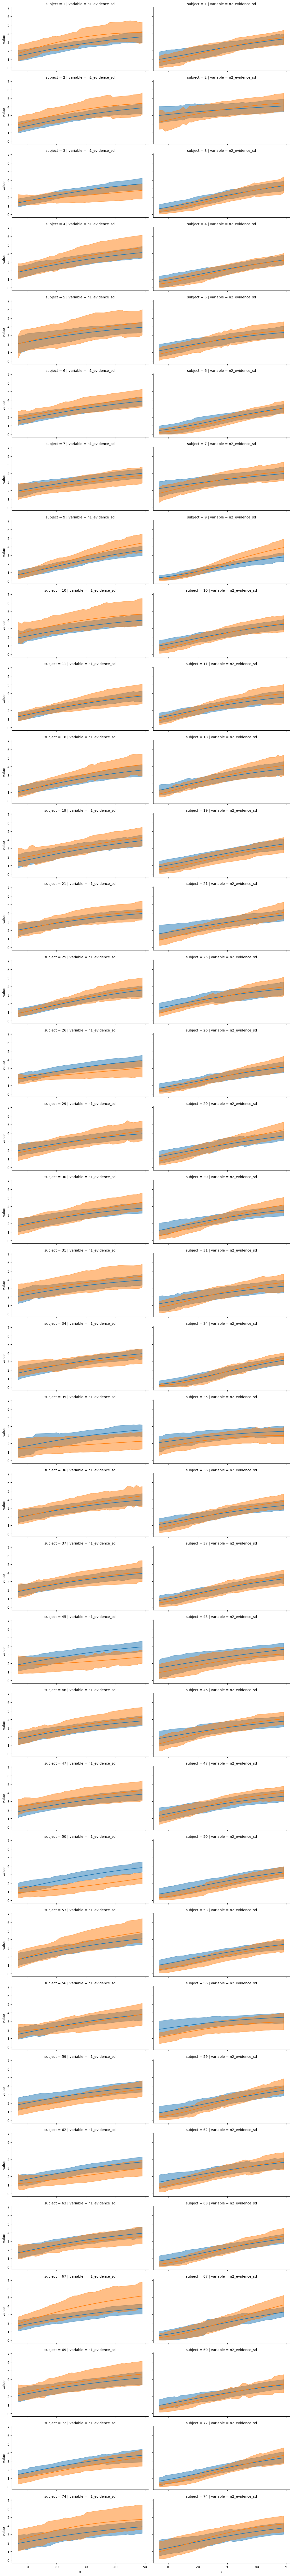

In [27]:
g = sns.FacetGrid(individual_curve_stats.droplevel(3).reset_index(), row='subject', col='variable', hue='stimulation_condition', height=3, aspect=2).map_dataframe(plot_prediction, x='x', y='value')

In [9]:
model.design_matrices

{}

In [8]:
idata.posterior['n1_evidence_sd_spline1']

<xarray.DataArray 'n1_evidence_sd_spline1' (chain: 4, draw: 5000, subject: 35,
                                            n1_evidence_sd_spline1_regressors: 2)>
[1400000 values with dtype=float64]
Coordinates:
  * chain                              (chain) int64 0 1 2 3
  * draw                               (draw) int64 0 1 2 3 ... 4997 4998 4999
  * subject                            (subject) int64 1 2 3 4 5 ... 67 69 72 74
  * n1_evidence_sd_spline1_regressors  (n1_evidence_sd_spline1_regressors) object ...

# 6-spline models

In [2]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1.6', 'flexible1.6a', 'flexible1.6b', 'flexible2.6', 'flexible2.6a', 'flexible2.6b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)
    model.build_estimation_model()
    curves.append(model.get_sd_curve(conditions, idata=idata, x=np.arange(7, 50), variable='both', group=True))
    curve_stats.append(FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(curves[-1].stack().to_frame('value'), groupby=['stimulation_condition']))

curve_stats = pd.concat(curve_stats, keys=model_labels, names=['model'])
curves = pd.concat(curves, keys=model_labels, names=['model'])

100%|██████████| 6/6 [00:34<00:00,  5.83s/it]


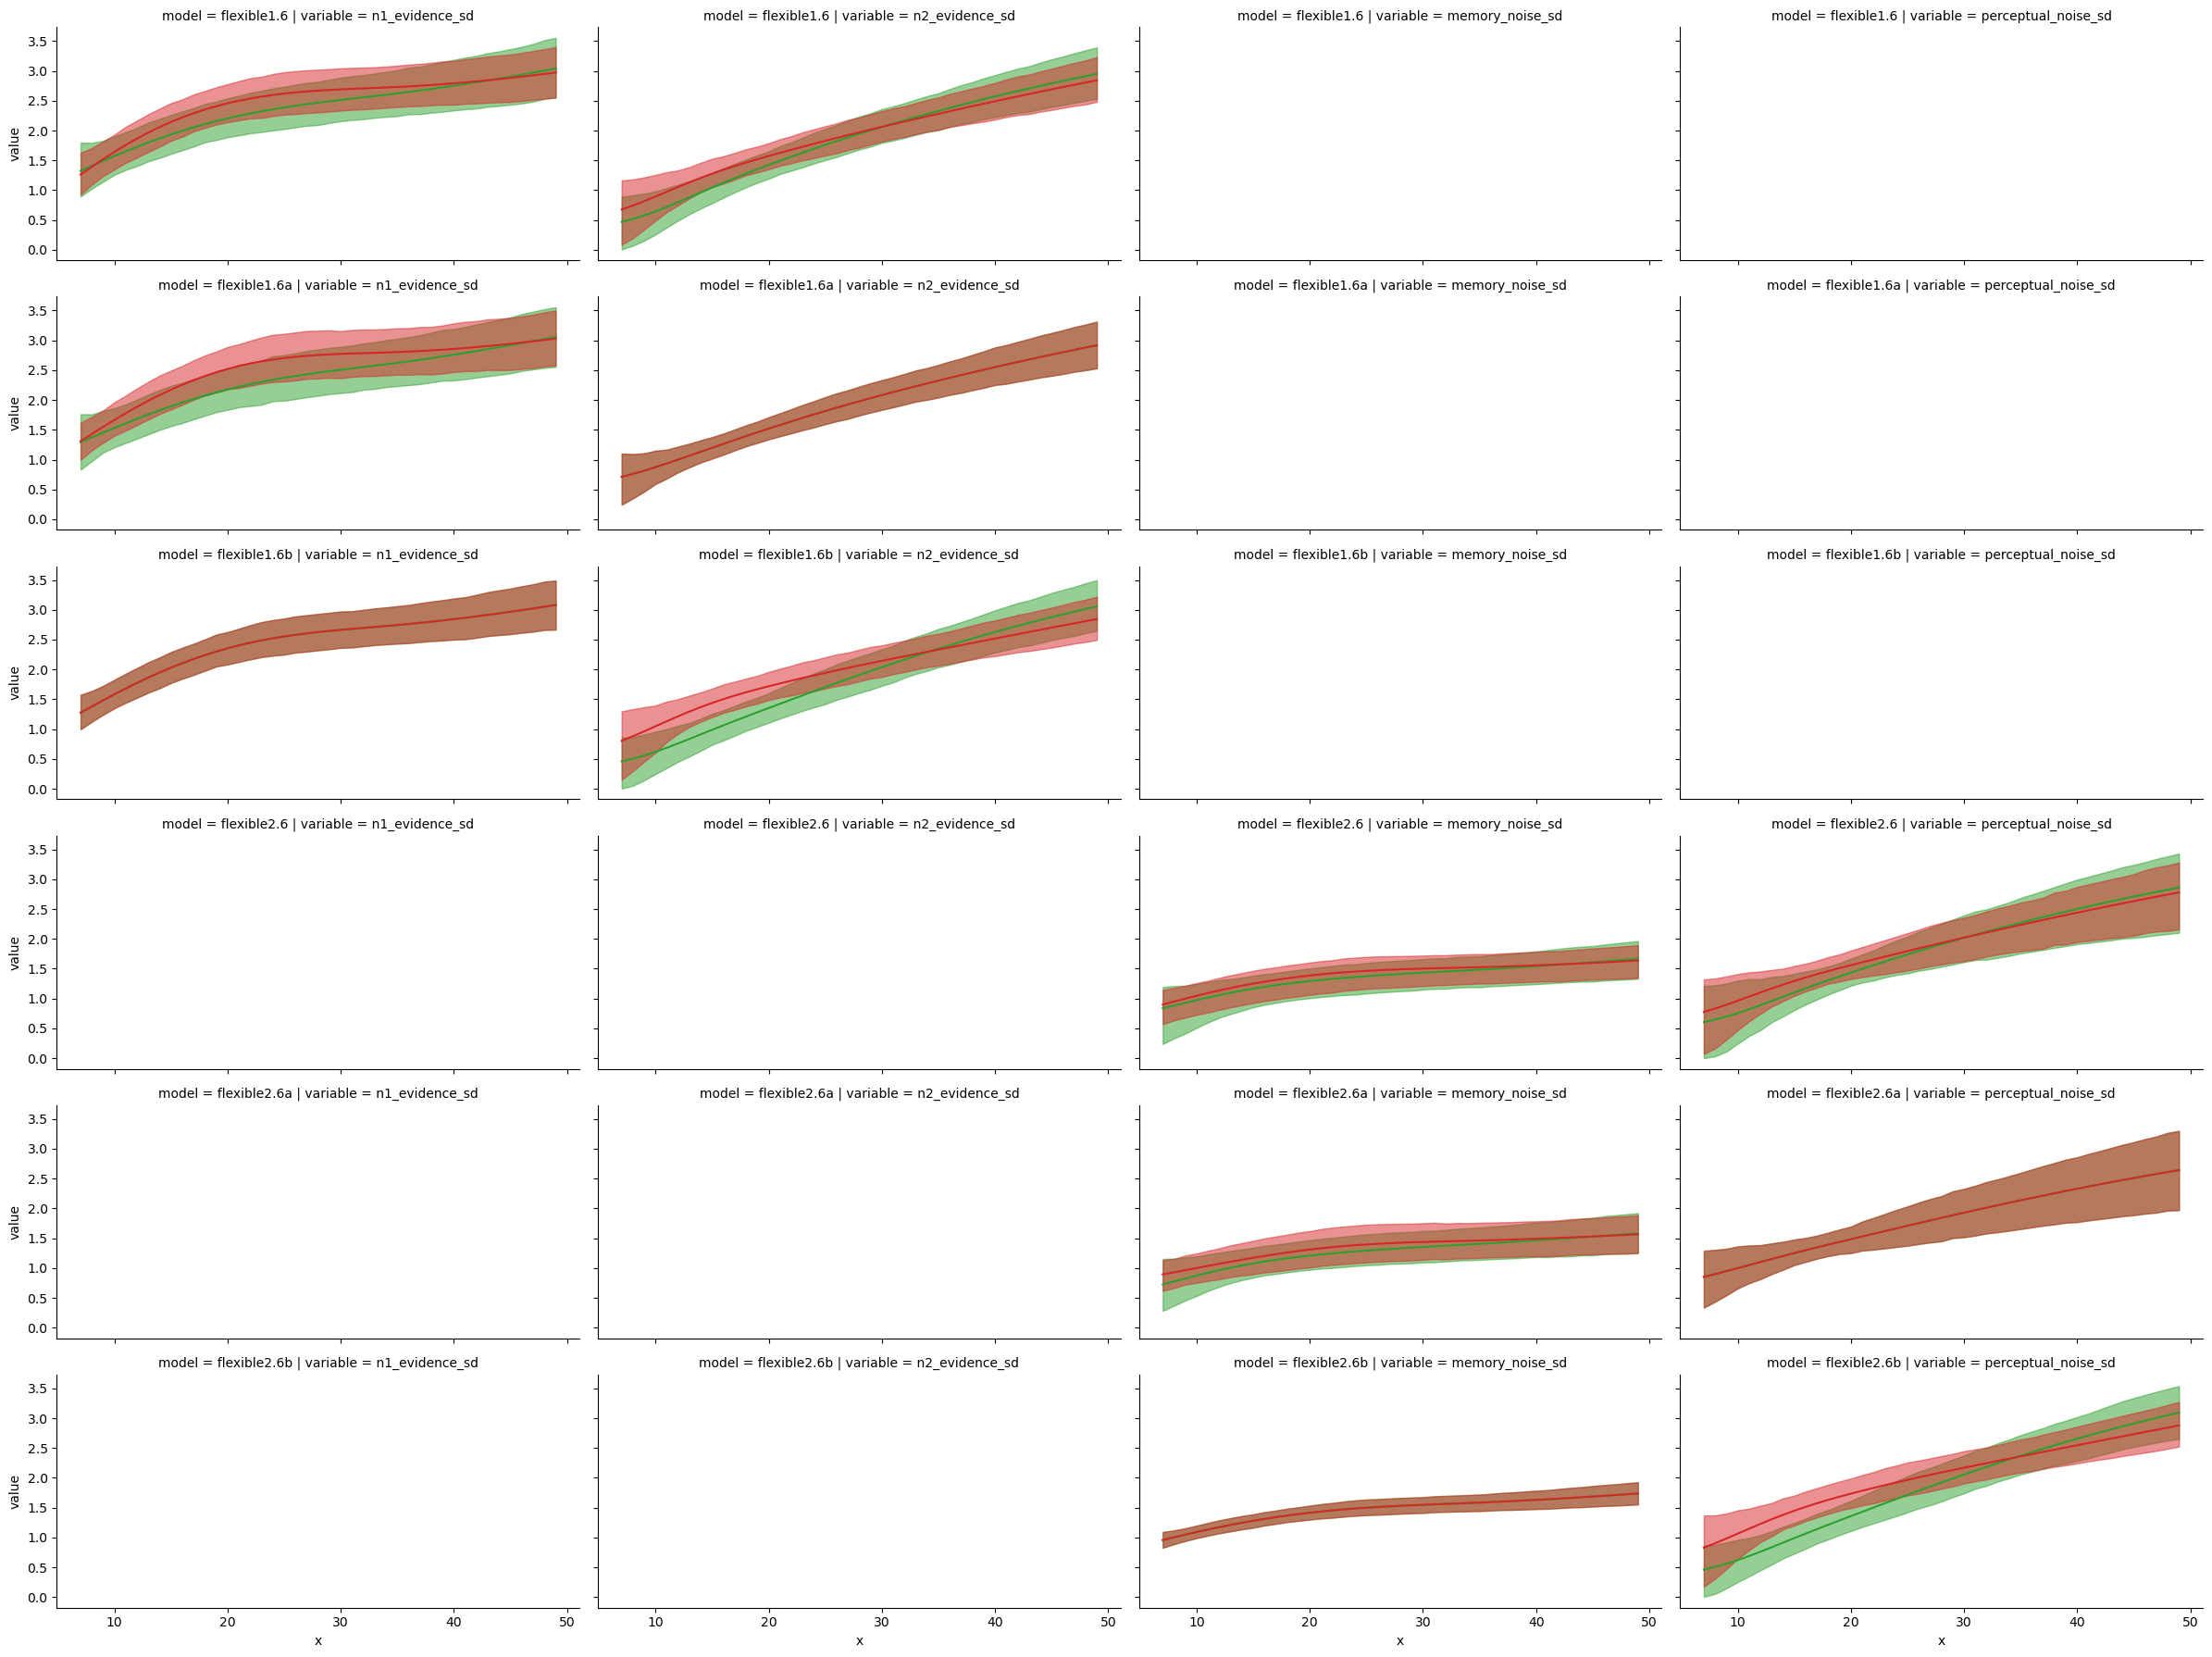

In [4]:
g = sns.FacetGrid(curve_stats.reset_index(), col='variable', hue='stimulation_condition', row='model', height=3, aspect=2, palette=stimulation_palette,
                  hue_order=['vertex', 'ips'])

g.map_dataframe(plot_prediction, x='x', y='value')

In [5]:
# Calculate differneces:

diff = curves.stack().unstack('stimulation_condition').diff(axis=1).mean(axis=1).to_frame('difference TMS - vertex')

diff_stats = FlexibleNoiseRiskRegressionModel.get_sd_curve_stats(diff, groupby=['model'])

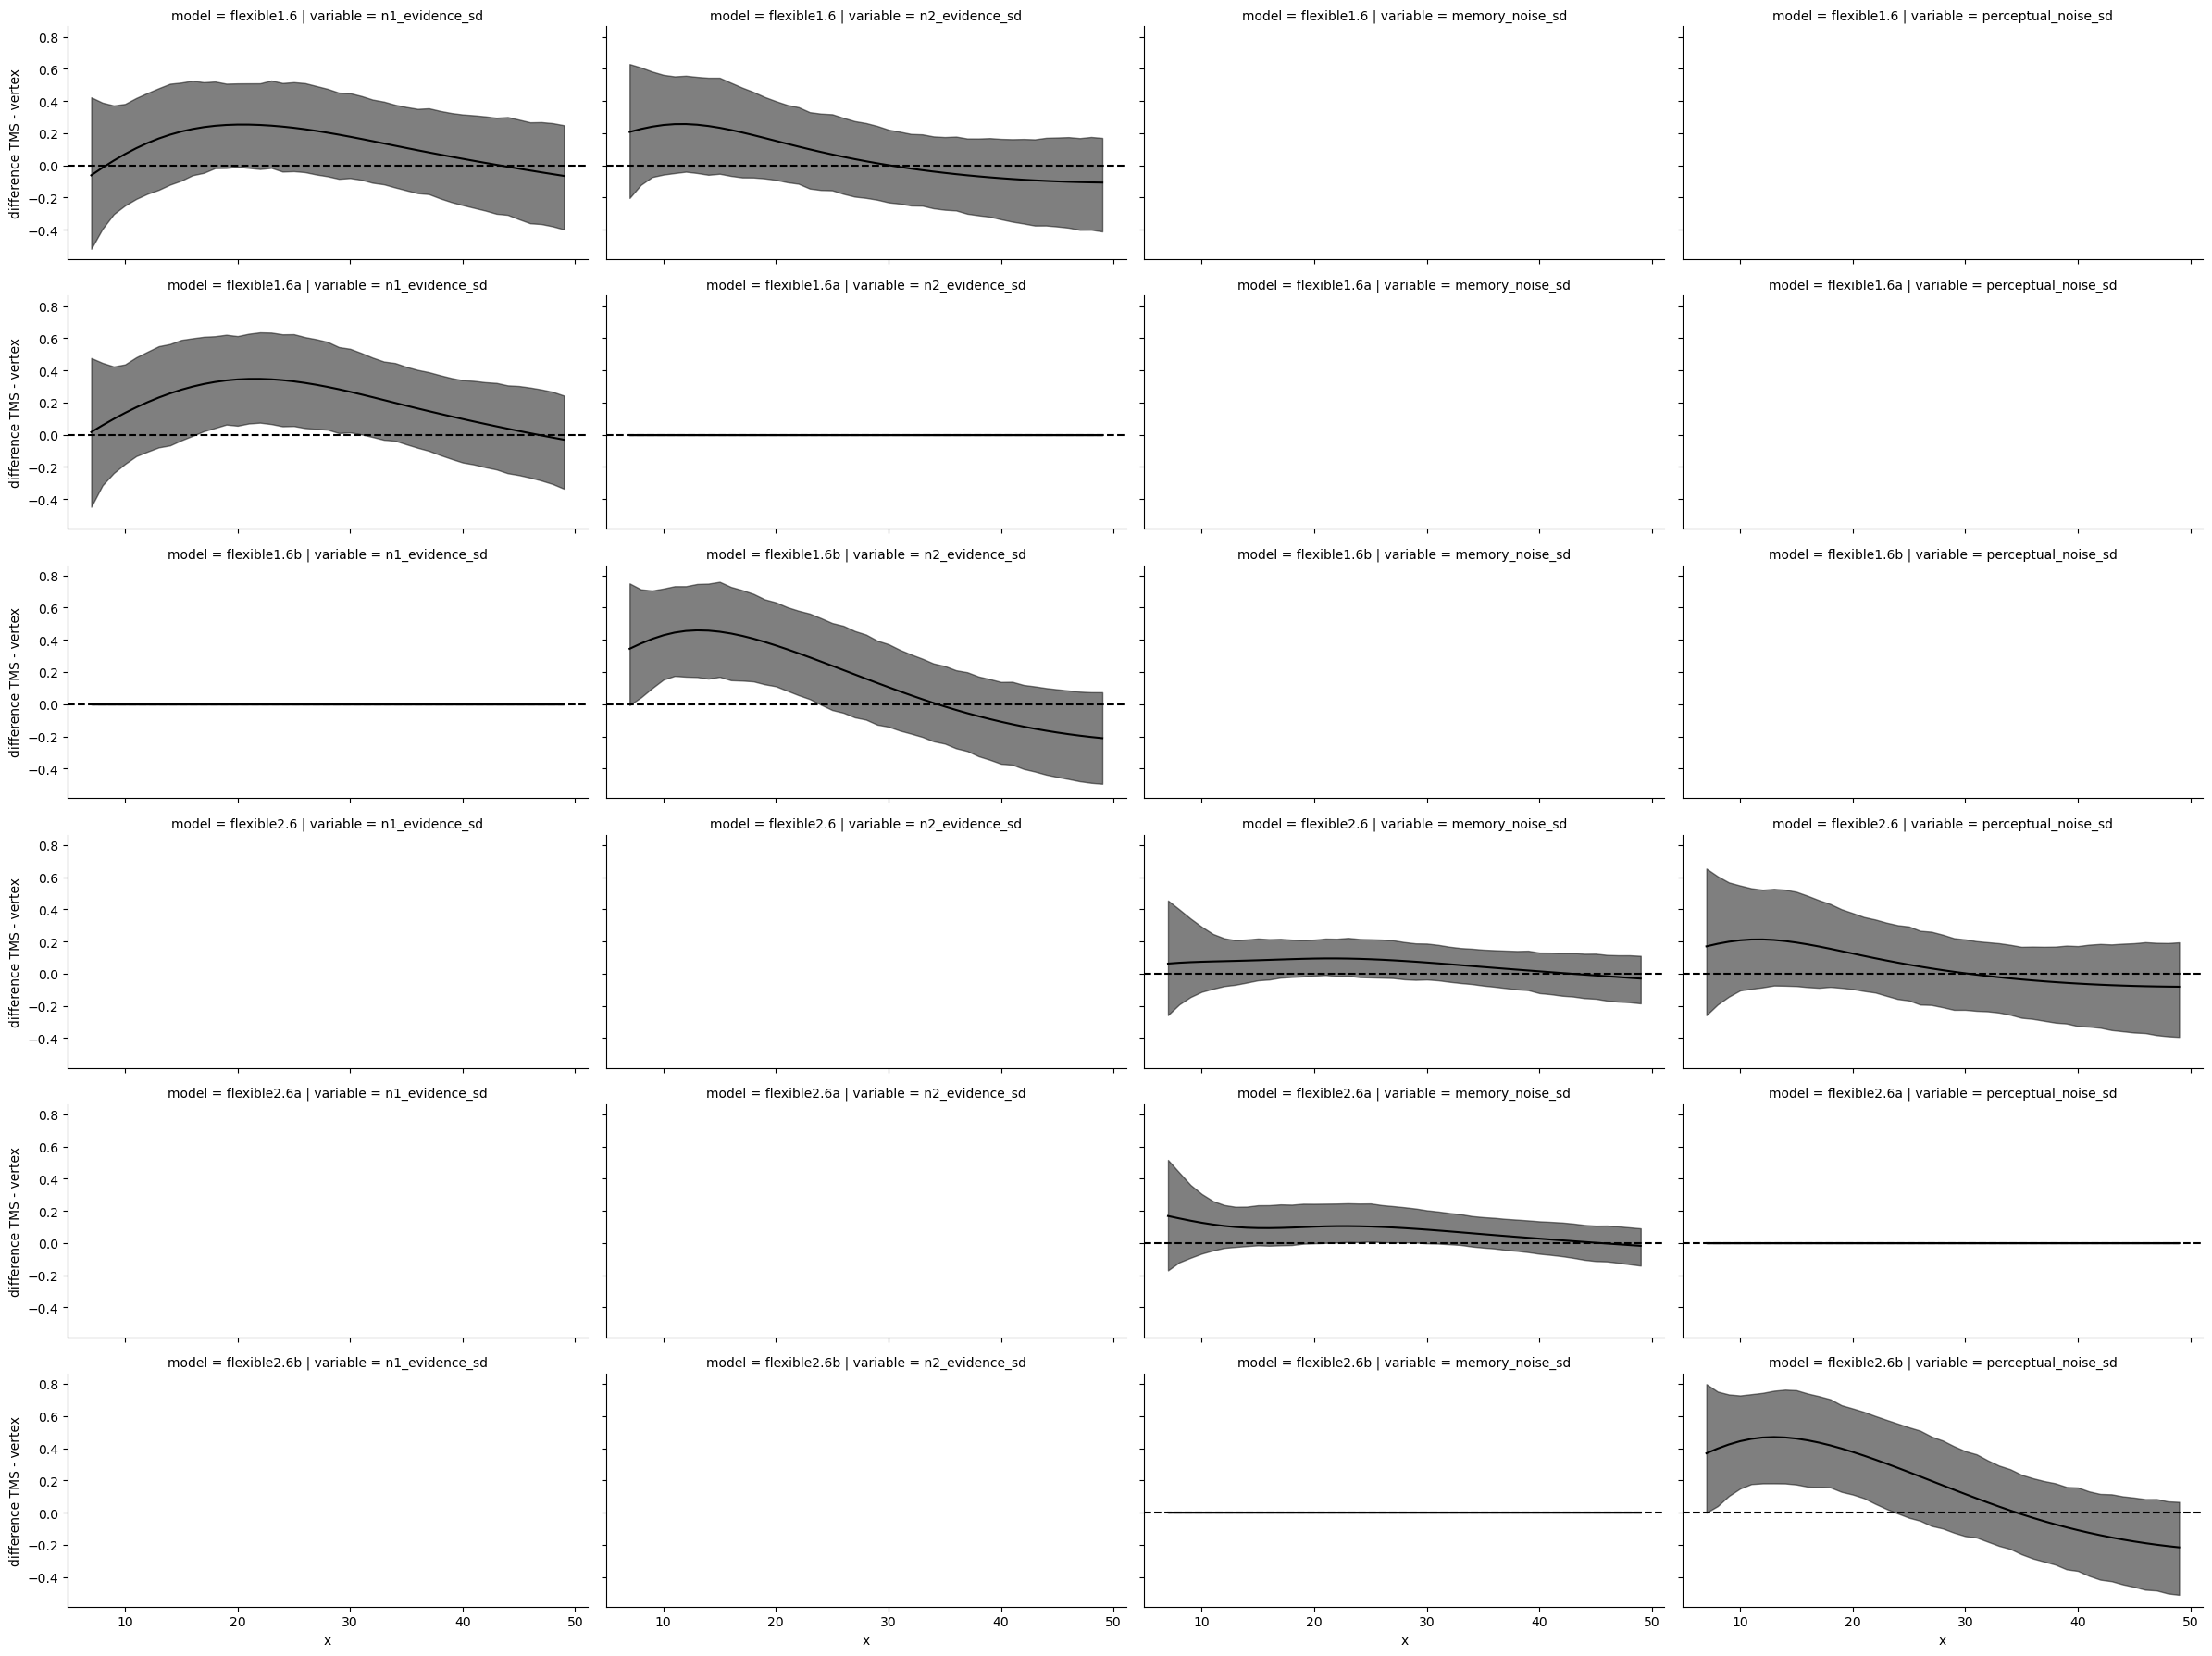

In [6]:
g = sns.FacetGrid(diff_stats.reset_index(), col='variable', row='model', height=3, aspect=2, palette=['k'],
                  row_order=model_labels, col_order=['n1_evidence_sd', 'n2_evidence_sd', 'memory_noise_sd', 'perceptual_noise_sd'])
g.map_dataframe(plot_prediction, x='x', y='difference TMS - vertex', color='k')

g.map(plt.axhline, y=0, color='black', linestyle='--')  